In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "data/tablaOrinaFlav.csv"
datos = pd.read_csv(url, encoding="unicode_escape", index_col=[0])
datos.head()

,numVol,Endulzante,X,EG,ES,HE.G,NG,NS,Tiempo,Peso.inicial,...,Delta.Grasa,IRCV.inicial,IRCV.Final,Bpmin.inicial,Bpmax.inicial,Bpmin.final,Bpmax.final,Frec.inicial,Frec.final,Sexo
1,1,ST,1 A0,13.679368,0.083526,7.174852,44.516499,6.049078,0,75.2,...,-3.7,8,7,86,137,85,120,70,98,MUJER
4,3,ST,3 A0,27.096693,0.060181,0.315785,30.279825,5.972404,0,80.4,...,-2.4,11,7,75,107,78,104,64,65,MUJER
12,9,ST,9 A0,80.113298,0.039980,0.000026,11.413849,4.744569,0,64.7,...,-1.0,9,9,76,107,69,102,74,69,MUJER
15,10,ST,10 A0,11.792109,0.020568,0.569949,3.248316,1.960048,0,91.3,...,-1.1,10,10,88,150,91,158,80,72,MUJER
21,14,ST,14 A0,2.053593,0.090621,0.666540,22.933157,37.012139,0,73.2,...,-2.2,8,8,93,134,80,120,80,81,MUJER


In [3]:
X_scaled = datos.drop(columns=(["numVol", "Endulzante", "X","Tiempo", "Sexo"])).to_numpy()

In [6]:
# Modelo
# ==============================================================================
modelo_gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=123)
modelo_gmm.fit(X=X_scaled)

GaussianMixture(n_components=4, random_state=123)

In [8]:
# Probabilidades
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
probabilidades = modelo_gmm.predict_proba(X_scaled)
probabilidades

array([[0.00000000e+000, 9.99996649e-001, 3.35062851e-006,
        0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 6.37855564e-012,
        0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 4.85894611e-013,
        2.66813283e-193],
       [0.00000000e+000, 3.43081860e-005, 9.99965692e-001,
        1.57720907e-263],
       [0.00000000e+000, 9.99914056e-001, 8.59440770e-005,
        4.75299752e-288],
       [0.00000000e+000, 9.90385002e-001, 9.61499805e-003,
        0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 1.65202586e-012,
        0.00000000e+000],
       [0.00000000e+000, 9.99998830e-001, 1.17014875e-006,
        0.00000000e+000],
       [0.00000000e+000, 9.81243442e-001, 1.87565584e-002,
        0.00000000e+000],
       [0.00000000e+000, 6.22926717e-003, 9.93770733e-001,
        1.27952063e-196],
       [0.00000000e+000, 9.98196168e-001, 1.80383154e-003,
        0.00000000e+000],
       [0.00000000e+000, 9.94443506e-001, 5.55649363e-003,
      

In [9]:
# Clasificación (asignación a la componente de mayor probabilidad)
# ==============================================================================
# Cada fila es una observación y cada columna la probabilidad de pertenecer a
# cada una de las componentes.
clasificacion = modelo_gmm.predict(X_scaled)
clasificacion

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 3, 1, 0, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3,
       2, 1, 3, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2, 3, 2,
       3, 3, 2, 2, 1, 2, 1, 2, 3, 0, 2, 2, 2, 3, 1, 1, 1, 2, 1, 2, 3, 1,
       1, 1, 2, 1, 2, 1, 1, 2, 3, 2, 0, 2, 1, 3, 3, 3, 2, 0, 3, 2, 3, 0,
       3, 0, 2, 2, 2, 3, 2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1,
       2], dtype=int64)

ValueError: Expected the input data X have 23 features, but got 2 features

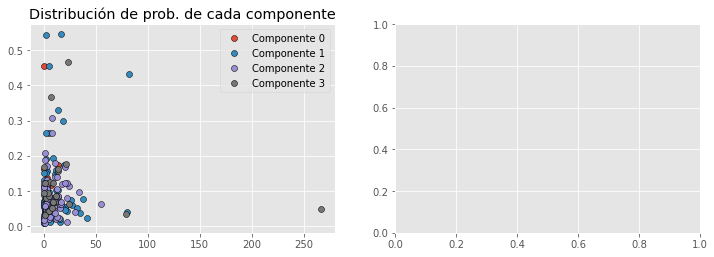

In [11]:
def make_ellipses(gmm, ax):
    for n in range(gmm.n_components):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        
        for i in range(1,3):
            ell = mpl.patches.Ellipse(gmm.means_[n], i*v[0], i*v[1],
                                      180 + angle, color="blue")
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.1)
            ax.add_artist(ell)
        

fig, axs = plt.subplots(1, 2, figsize=(12, 3.84))

# Distribución de probabilidad de cada componente
for i in np.unique(clasificacion):
    axs[0].scatter(
        x = X_scaled[clasificacion == i, 0],
        y = X_scaled[clasificacion == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black', 
        label= f"Componente {i}"
    )

make_ellipses(modelo_gmm, ax = axs[0])
axs[0].set_title('Distribución de prob. de cada componente')
axs[0].legend()

# Distribución de probabilidad del modelo completo
xs = np.linspace(min(X_scaled[:, 0]), max(X_scaled[:, 0]), 1000)
ys = np.linspace(min(X_scaled[:, 1]), max(X_scaled[:, 1]), 1000)
xx, yy = np.meshgrid(xs, ys)
scores = modelo_gmm.score_samples(np.c_[xx.ravel(), yy.ravel()], )
axs[1].scatter(X_scaled[:, 0], X_scaled[:, 1], s=5, alpha=.6, c=plt.cm.tab10(clasificacion))
scores = np.exp(scores) # Las probabilidades están en log
axs[1].contour(
    xx, yy, scores.reshape(xx.shape),
    levels=np.percentile(scores, np.linspace(0, 100, 10))[1:-1]
)
axs[1].set_title('Distribución de prob. del modelo completo');